In [34]:
import pandas as pd 
import numpy as np
import talib
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [35]:
result = pd.read_csv('./result.csv')
result['date'] = pd.to_datetime(result['date'])

In [36]:
result

,date,stock_id,Unnamed: 0_x,open,close,high,low,volume,amount,ht_dcperiod,...,buy_price,sell_price,lowest_price,highest_price,buy_date,sell_date,profit(%),MAE,BMFE,GMFE
0,2014-12-31,1476,179.0,319.50,321.00,322.50,318.00,428829.0,1.375469e+08,21.413027,...,317.0,311.50,299.0,317.00,2015-01-05,2015-01-09,-1.735016,5.678233,0.000000,0.000000
1,2015-01-09,1476,719.0,314.00,311.50,315.00,309.50,1301640.0,4.051355e+08,18.504793,...,306.5,323.00,306.5,349.50,2015-01-12,2015-02-11,5.383361,0.000000,2.446982,14.029364
2,2015-02-10,1476,539.0,323.00,320.00,328.00,319.00,1253076.0,4.030960e+08,19.770761,...,323.0,385.00,323.0,388.50,2015-02-11,2015-03-11,19.195046,0.000000,0.000000,20.278638
3,2015-03-10,1476,539.0,383.00,388.50,396.50,383.00,1570806.0,6.137458e+08,20.365226,...,385.0,413.50,371.5,413.50,2015-03-11,2015-04-01,7.402597,3.506494,2.337662,7.402597
4,2015-03-31,1476,539.0,411.00,411.50,416.00,407.00,1877617.0,7.744404e+08,28.202077,...,413.5,390.00,390.0,422.50,2015-04-01,2015-04-10,-5.683192,5.683192,2.176542,2.176542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,2024-01-10,2739,8279.0,62.50,61.90,62.80,61.10,1351803.0,8.372010e+07,22.200905,...,63.5,58.70,54.9,63.50,2024-01-11,2024-02-05,-7.559055,13.543307,0.000000,0.000000
12008,2024-02-05,2365,5219.0,18.75,19.85,19.85,18.60,66463235.0,1.291956e+09,16.251551,...,21.8,19.90,19.9,25.45,2024-02-15,2024-03-11,-8.715596,8.715596,16.743119,16.743119
12009,2024-03-08,2365,4319.0,23.55,20.75,23.80,20.75,21497379.0,4.589064e+08,21.431088,...,19.9,21.85,19.9,21.85,2024-03-11,2024-03-12,9.798995,0.000000,0.000000,9.798995
12010,2024-03-08,3312,10259.0,46.70,41.55,47.95,41.55,15353749.0,6.731710e+08,37.729504,...,38.2,38.10,38.1,38.20,2024-03-11,2024-03-12,-0.261780,0.261780,0.000000,0.000000


In [37]:
test = result.copy()
X = test.copy().drop(columns=["Unnamed: 0_x","open","close","high","low", "stock_id","acos","asin","profit(%)","buy_price","buy_date", "sell_date","volume","amount","cosh","exp","sinh","Unnamed: 0_y","sell_price","sell_price","lowest_price","highest_price","MAE","BMFE","GMFE"])
X_train = X[X['date'].dt.year <= 2020].drop(columns=["date"])
X_test = X[X['date'].dt.year >= 2021].drop(columns=["date"])

## Feature distribution overlap

In [38]:
stat_train = X_train.describe()

In [39]:
stat_test = X_test.describe()

In [40]:
stat_train

,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,leadsine,ht_trendmode,add,div,max_x,...,stddev,tsf,var,atr,natr,trange,ad,adosc,obv,mfs_score
count,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,...,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7.983000e+03,7.983000e+03,7.983000e+03,7983.000000
mean,21.991169,136.440001,-0.372150,0.528739,-0.051057,-0.133770,0.839659,167.595449,1.031159,92.877518,...,1.920574,83.788600,18.627292,3.022704,3.608109,3.025366,-1.591323e+09,-2.091077e+06,2.174274e+09,68.790680
std,5.179970,99.243920,13.230906,15.814894,0.602796,0.713283,0.366945,175.870980,0.020829,100.636277,...,3.865302,87.249738,182.641128,4.318576,3.000570,4.876615,4.616728e+09,1.306070e+07,4.573365e+09,7.284267
min,9.992834,-44.856146,-354.793264,-288.156190,-0.999999,-1.000000,0.000000,11.550000,1.000000,6.930000,...,0.020000,-43.223077,0.000400,0.087849,0.684915,0.050000,-5.437613e+10,-2.856439e+08,-2.916096e+09,48.000000
25%,18.233395,39.069494,-0.933863,-1.797630,-0.559413,-0.819090,1.000000,62.950000,1.016949,34.900000,...,0.389102,31.637363,0.151400,0.897247,2.319295,0.750000,-1.522131e+09,-3.736659e+06,2.020612e+08,63.000000
50%,21.148559,162.556405,0.094773,-0.002782,-0.063627,-0.319206,1.000000,108.100000,1.025424,59.600000,...,0.845577,54.343956,0.715000,1.694507,3.143965,1.500000,-3.853369e+08,-1.052225e+06,8.797110e+08,68.000000
75%,24.956033,208.376533,1.257992,1.809495,0.434781,0.598892,1.000000,193.550000,1.039142,107.000000,...,1.974842,97.038462,3.900000,3.491346,4.170833,3.500000,-3.281847e+07,7.372001e+05,2.472483e+09,74.000000
max,45.862349,314.994227,193.240908,333.618089,1.000000,1.000000,1.000000,1950.000000,1.199074,1230.000000,...,101.455731,963.406593,10293.265400,104.843520,83.988133,87.000000,1.204694e+10,2.349499e+08,1.024684e+11,92.000000


In [41]:
for colname in stat_train.columns:
    
    diff = stat_train[colname]['mean'] - stat_test[colname]['mean']
    mean_std = (stat_train[colname]['std'] + stat_test[colname]['std']) // 2
    
    print(f'{colname}\t{diff/mean_std}')

ht_dcperiod	-0.05298790826976614
ht_dcphase	-0.012865145829383154
inphase	-0.07481408761440701
quadrature	0.07421858763747465
sine	-inf
leadsine	inf
ht_trendmode	-inf
add	-0.4131017976282135
div	-inf
max_x	-0.4062542630769499
maxindex	-0.8081240511068819
min_x	-0.40397110244624246
minindex	-0.8075532679750685
min_y	-0.40397110244624246
max_y	-0.4062542630769499
minidx	-0.8075532679750685
maxidx	-0.8081240511068819
mult	-0.3224340854326858
sub	-0.35105494093041534
sum	-0.40379058117423855
atan	-inf
ceil	-0.4129112627258743
cos	-inf
floor	-0.4134837107956698
ln	-inf
log10	-inf
sin	inf
sqrt	-0.5134856775846477
tan	0.026938292264654183
tanh	-inf
adx	0.01324054324234099
adxr	0.03674618587707812
apo	-0.09353161206652678
aroondown	0.038692771845285044
aroonup	-0.022171344476748674
aroonosc	-0.03519287702688067
bop	inf
cci	-0.020422575506020526
cmo	-0.011847446939477847
dx	-0.006608682622228164
macd_x	-0.11270954195339596
macdsignal_x	-0.12477509312100091
macdhist_x	-0.0261908930576856
macd_y	

/var/folders/nl/_b7k4sy95m74b5fz6bk7mwcc0000gn/T/ipykernel_60710/2466404015.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  print(f'{colname}\t{diff/mean_std}')
/var/folders/nl/_b7k4sy95m74b5fz6bk7mwcc0000gn/T/ipykernel_60710/2466404015.py:6: RuntimeWarning: invalid value encountered in scalar divide
  print(f'{colname}\t{diff/mean_std}')


We should be very careful for those features with (1) inf, (2) nan or (3) large absolute value, which indicate that the features might not aligh well from training to testing

**Some code for the histogram of candle features (pattern recognition features)**

In [42]:
colname = 'cdlhighwave'
diff = stat_train[colname]['mean'] - stat_test[colname]['mean']
mean_std = (stat_train[colname]['std'] + stat_test[colname]['std']) // 2

In [43]:
from collections import Counter

In [44]:
Counter(X_train['cdlhighwave'])

Counter({0: 7127, 100: 619, -100: 237})

In [45]:
stat_train['cdlhighwave']

count    7983.000000
mean        4.785168
std        32.396176
min      -100.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: cdlhighwave, dtype: float64

In [46]:
pattern = [name for name in list(result.columns) if name[:3] == 'cdl']

pattern2drop = \
    ['cdl3starsinsouth', 'cdlabandonedbaby' , 'cdlconcealbabyswall'] + \
    ['cdlbreakaway' , 'cdl2crows', 'cdl3blackcrows','cdleveningdojistar' , 'cdleveningdojistar' ] + \
    ['cdl3linestrike' , 'cdl3whitesoldiers' ]

pattern = list(set(pattern) - set(pattern2drop))

In [30]:
pattern

['cdlhikkake',
 'cdladvanceblock',
 'cdlgravestonedoji',
 'cdllongleggeddoji',
 'cdlgapsidesidewhite',
 'cdltasukigap',
 'cdleveningstar',
 'cdlhammer',
 'cdlkicking',
 'cdlkickingbylength',
 'cdlmorningstar',
 'cdltristar',
 'cdlspinningtop',
 'cdlhighwave',
 'cdlmarubozu',
 'cdlstalledpattern',
 'cdlhikkakemod',
 'cdlhomingpigeon',
 'cdlmorningdojistar',
 'cdllongline',
 'cdltakuri',
 'cdlxsidegap3methods',
 'cdlidentical3crows',
 'cdlbelthold',
 'cdldoji',
 'cdlpiercing',
 'cdl3inside',
 'cdlonneck',
 'cdlsticksandwich',
 'cdlclosingmarubozu',
 'cdlshootingstar',
 'cdlengulfing',
 'cdlinneck',
 'cdlthrusting',
 'cdlunique3river',
 'cdlhangingman',
 'cdlcounterattack',
 'cdldragonflydoji',
 'cdldarkcloudcover',
 'cdlharami',
 'cdlharamicross',
 'cdlladderbottom',
 'cdlrisefall3methods',
 'cdlmathold',
 'cdlupsidegap2crows',
 'cdlmatchinglow',
 'cdldojistar',
 'cdl3outside',
 'cdlseparatinglines',
 'cdlrickshawman',
 'cdlinvertedhammer',
 'cdlshortline']

In [47]:
date = ['date']  # used for train test split, drop later

momentum = ['aroonup', 'aroondown', 'aroonosc', 'mom']  # momentum indicators

overlap = ['middleband' ,'midpoint' ,'midprice']  # overlap studies

volume = []  # volume indicators

volatility = ['natr']

price_transform = ['wclprice']

cycle = ['ht_dcphase']

In [48]:
keep_columns = pattern + momentum + overlap + volatility + price_transform
X = result[date + keep_columns]

X_train = np.array(X[X['date'].dt.year <= 2020].drop(columns=["date"]))
X_test = np.array(X[X['date'].dt.year >= 2021].drop(columns=["date"]))
y_train = np.array(test[test['date'].dt.year <= 2020][["profit(%)"]]).reshape(-1)
y_test = np.array(test[test['date'].dt.year >= 2021][["profit(%)"]]).reshape(-1)

## Preprocessing

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [51]:
from sklearn import metrics

In [52]:
def test_model(y_true, y_pred):
    print(f'r2 \t {metrics.r2_score(y_true, y_pred)}')
    print(f'corr \t {np.corrcoef(y_true.reshape(-1), y_pred.reshape(-1))[0, 1]}')
    print(f'mae \t {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'rmse \t {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')

In [53]:
X_train.shape

(7983, 61)

(array([ 106., 1118., 2280.,  404.,   84.,   24.,    7.,    3.,    0.,
           3.]),
 array([-35.46712803, -19.60583722,  -3.74454641,  12.1167444 ,
         27.9780352 ,  43.83932601,  59.70061682,  75.56190763,
         91.42319844, 107.28448924, 123.14578005]),
 <BarContainer object of 10 artists>)

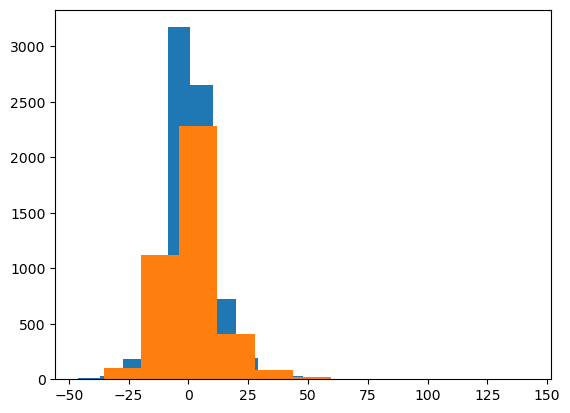

In [54]:
plt.hist(y_train, bins=20)
plt.hist(y_test)

## No prediction

In [55]:
y_pred_naive = y_train.mean(axis=0, keepdims=True)
test_model(y_test, y_pred_naive * np.ones_like(y_test))

r2 	 -0.0011917004581476487
corr 	 -4.589134812805391e-18
mae 	 8.274999354506045
rmse 	 12.304691203145364


## Linear Regression


In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print('train')
test_model(y_train, lr.predict(X_train))
print('test')
test_model(y_test, lr.predict(X_test))

train
r2 	 0.017191254289068758
corr 	 0.1311167923305701
mae 	 7.307338915244803
rmse 	 10.478452984068234
test
r2 	 -1.1325589523108456e+19
corr 	 -0.003670118860500604
mae 	 1303988832.8753672
rmse 	 41384956918.27069


In [59]:
linregress(lr.predict(X_test), y_test)

LinregressResult(slope=-1.0911021517311409e-12, intercept=1.3704825173127935, rvalue=-0.003670118860500604, pvalue=0.8158490705554486, stderr=4.684805263060381e-12, intercept_stderr=0.19388046398223244)

## XGBoost Regressor

In [63]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor().fit(X_train, y_train)
test_model(y_train, xgb_regressor.predict(X_train))
test_model(y_test, xgb_regressor.predict(X_test))

r2 	 0.6096436265429391
corr 	 0.8247925978534731
mae 	 4.779882436435389
rmse 	 6.603790697560076
r2 	 -0.17630037584453007
corr 	 -0.0032229106584695227
mae 	 9.317957249163856
rmse 	 13.337401242073797


## RF

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train, y_train)
test_model(y_train, rf.predict(X_train))
test_model(y_test, rf.predict(X_test))

r2 	 0.8491512025285884
corr 	 0.9797250108020059
mae 	 2.8322949590180047
rmse 	 4.1051930886511645
r2 	 -0.06645084568300708
corr 	 0.017379918699698006
mae 	 8.752388694413222
rmse 	 12.699380046888976


In [65]:
linregress(rf.predict(X_test), y_test)

LinregressResult(slope=0.06341788554226407, intercept=1.3052579884326396, rvalue=0.017379918699698002, pvalue=0.2700614861362784, stderr=0.05749202433353376, intercept_stderr=0.2022052053449694)

# Model save and Load

In [66]:
import pickle


def model_save(column_names, model, save_path):
    """
    Input: 
        column_names: list of feature names used in the model
        model: a (scikit-learn) model that takes np.array as input, and output np.array
    """
    with open(save_path, 'wb') as f:
        pickle.dump({'column_names': column_names, 'model': model}, f)
        

def model_load(load_path):
    with open(load_path, 'rb') as f:
        dic = pickle.load(f)
    
    column_names, model = dic['column_names'], dic['model']
    
    def inference(dataframe):
        X = np.array(dataframe[column_names])
        y = model.predict(X)
        assert len(y) == len(X)
        return y
        
    return inference

In [67]:
model_save(keep_columns, rf, './random_forest_model.pkl')

In [68]:
inference = model_load('./random_forest_model.pkl')

In [69]:
# how to use "inference"? 
result.head()

,date,stock_id,Unnamed: 0_x,open,close,high,low,volume,amount,ht_dcperiod,...,buy_price,sell_price,lowest_price,highest_price,buy_date,sell_date,profit(%),MAE,BMFE,GMFE
0,2014-12-31,1476,179.0,319.5,321.0,322.5,318.0,428829.0,137546863.0,21.413027,...,317.0,311.5,299.0,317.0,2015-01-05,2015-01-09,-1.735016,5.678233,0.000000,0.000000
1,2015-01-09,1476,719.0,314.0,311.5,315.0,309.5,1301640.0,405135540.0,18.504793,...,306.5,323.0,306.5,349.5,2015-01-12,2015-02-11,5.383361,0.000000,2.446982,14.029364
2,2015-02-10,1476,539.0,323.0,320.0,328.0,319.0,1253076.0,403095972.0,19.770761,...,323.0,385.0,323.0,388.5,2015-02-11,2015-03-11,19.195046,0.000000,0.000000,20.278638
3,2015-03-10,1476,539.0,383.0,388.5,396.5,383.0,1570806.0,613745817.0,20.365226,...,385.0,413.5,371.5,413.5,2015-03-11,2015-04-01,7.402597,3.506494,2.337662,7.402597
4,2015-03-31,1476,539.0,411.0,411.5,416.0,407.0,1877617.0,774440353.0,28.202077,...,413.5,390.0,390.0,422.5,2015-04-01,2015-04-10,-5.683192,5.683192,2.176542,2.176542


In [70]:
inference(result.head())

array([ -5.30013436, -13.95608754, -13.90353087,  -1.82055985,
        -0.47473331])